<a href="https://colab.research.google.com/github/Freesoul-tech/Louis-Mahobe/blob/main/SMV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchLogisticRegression:
    def __init__(self, num_iter, lr, bias, verbose, reg_lambda):
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.reg_lambda = reg_lambda
        self.loss = {}
        self.val_loss = {}

    def _add_bias(self, X):
        if self.bias:
            return np.hstack([np.ones((X.shape[0], 1)), X])
        return X

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, X, y):
        m = X.shape[0]
        h = self._sigmoid(X @ self.coef_)
        loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        reg_term = (self.reg_lambda / (2 * m)) * np.sum(self.coef_[1:]**2) # Exclude bias term from regularization
        return loss + reg_term

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        h = self._sigmoid(X @ self.coef_)
        gradient = (X.T @ (h - y)) / m
        reg_gradient = (self.reg_lambda / m) * np.concatenate([np.array([0]), self.coef_[1:]]) # Exclude bias term from regularization
        self.coef_ -= self.lr * (gradient + reg_gradient)

    def fit(self, X, y, X_val=None, y_val=None, patience=10):
        X = self._add_bias(X)
        if X_val is not None:
            X_val = self._add_bias(X_val)
        self.coef_ = np.zeros(X.shape[1])
        best_loss = float('inf')
        wait = 0

        for i in range(self.iter):
            self._gradient_descent(X, y)
            self.loss[i] = self._compute_loss(X, y)
            if X_val is not None:
                val = self._compute_loss(X_val, y_val)
                self.val_loss[i] = val
                if val < best_loss:
                    best_loss = val
                    wait = 0
                else:
                    wait += 1
                    if wait >= patience:
                        print(f"Early stopping at iteration {i}")
                        break

    def predict_proba(self, X):
        X = self._add_bias(X)
        return self._sigmoid(X @ self.coef_)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [18]:
X_train = np.random.rand(100, 5)
y_train = (X_train.sum(axis=1) > 2.5).astype(int)
X_val = np.random.rand(50, 5)
y_val = (X_val.sum(axis=1) > 2.5).astype(float)

Early stopping at iteration 144


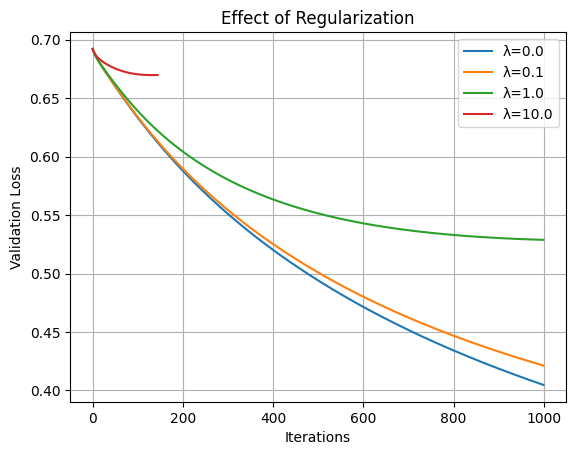

In [19]:
for reg in [0.0, 0.1, 1.0, 10.0]:
    model = ScratchLogisticRegression(num_iter=1000, lr=0.1, bias=True, verbose=False, reg_lambda=reg)
    model.fit(X_train, y_train, X_val, y_val)
    # Extract values from the dictionary before plotting
    plt.plot(list(model.val_loss.values()), label=f"λ={reg}")
plt.xlabel("Iterations")
plt.ylabel("Validation Loss")
plt.title("Effect of Regularization")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
def fit(self, X, y, X_val=None, y_val=None, patience=10):
    X = self._add_bias(X)
    if X_val is not None:
        X_val = self._add_bias(X_val)
    self.coef_ = np.zeros(X.shape[1])
    best_loss = float('inf')
    wait = 0

    for i in range(self.iter):
        self._gradient_descent(X, y)
        self.loss[i] = self._compute_loss(X, y)
        if X_val is not None:
            val = self._compute_loss(X_val, y_val)
            self.val_loss[i] = val
            if val < best_loss:
                best_loss = val
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print(f"Early stopping at iteration {i}")
                    break


In [21]:
def save_weights(self, filename="weights.npz"):
    np.savez(filename, coef=self.coef_)

def load_weights(self, filename="weights.npz"):
    self.coef_ = np.load(filename)["coef"]


In [25]:
class ScratchSVM():
    def __init__(self, lr=0.01, num_iter=1000, C=1.0, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.C = C
        self.verbose = verbose
        self.loss = []

    def fit(self, X, y):
        y = y.copy()
        y[y == 0] = -1  # Convert labels to {-1, 1}
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        for i in range(self.num_iter):
            margin = y * (X @ self.w + self.b)
            mask = margin < 1
            dw = self.w - self.C * np.dot(X[mask].T, y[mask]) / m
            db = -self.C * np.sum(y[mask]) / m

            self.w -= self.lr * dw
            self.b -= self.lr * db

            loss = 0.5 * np.dot(self.w, self.w) + self.C * np.sum(np.maximum(0, 1 - margin)) / m
            self.loss.append(loss)

            if self.verbose and i % 100 == 0:
                print(f"Iter {i}: Loss = {loss:.4f}")

    def predict(self, X):
        return (X @ self.w + self.b >= 0).astype(int)


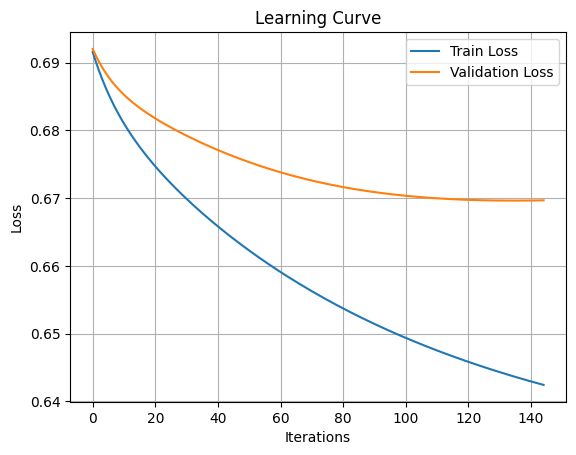

In [27]:
plt.plot(list(model.loss.values()), label="Train Loss")
plt.plot(list(model.val_loss.values()), label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()
